In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nssstats.plots import std_plot
from nssstats.plots import iqr_plot

In [2]:
espn_100 = pd.read_csv("espn_100_database.csv")
espn_100.head()

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,height,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,6'9'',81,255.0,NaN,99,UCLA,Pac-12,Power 5,YES,NO
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,6'5'',77,205.0,NaN,98,Indiana,Big Ten,Power 5,YES,YES
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,6'4'',76,195.0,NaN,98,USC,Pac-12,Power 5,YES,YES
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,6'8'',80,215.0,NaN,98,Duke,ACC,Power 5,YES,YES
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,6'4'',76,195.0,NaN,98,Memphis,CUSA,Mid Major,YES,YES


Let's see the number of players by position

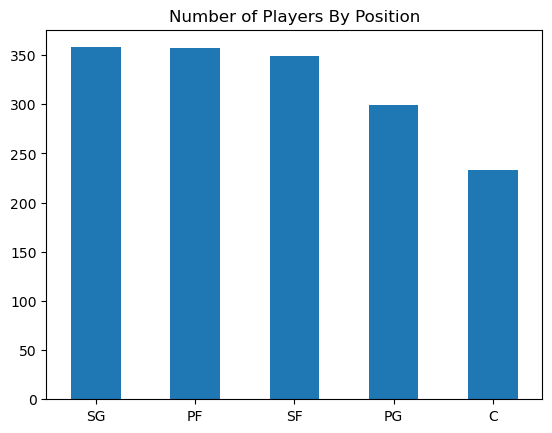

In [3]:
espn_100.pos.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of Players By Position');

Let's see the number of players by Type of High School

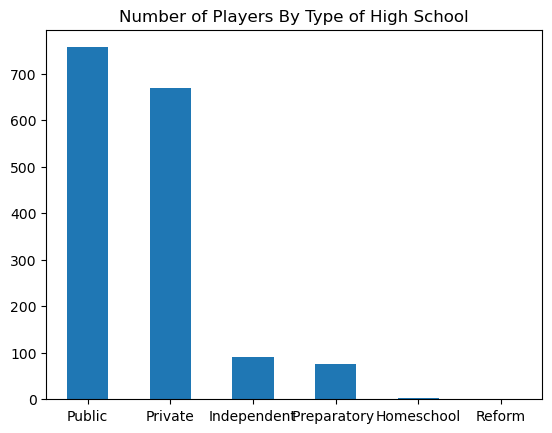

In [4]:
espn_100.hs_type.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of Players By Type of High School');

# Player Weight Statisitcs

In [5]:
espn_100.weight.mean()

200.2820189274448

In [6]:
espn_100.weight.median()

195.0

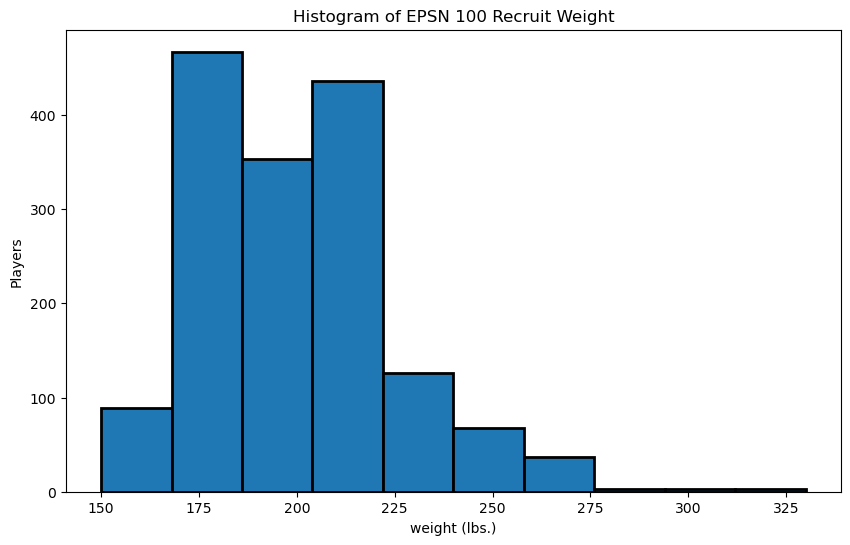

In [7]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = espn_100,
    x = 'weight',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('weight (lbs.)')                            
plt.ylabel('Players')
plt.title('Histogram of EPSN 100 Recruit Weight');

Let's look at range in weight

In [8]:
espn_100.weight.max()

330.0

In [9]:
espn_100.nlargest(1,'weight')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,height,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc
478,2011,82,Sim Bhullar,Sim,Bhullar,C,"Toronto, Ontario, CAN",Huntington Prep,Preparatory,Catholic,...,7'4'',88,330.0,4.0,93,New Mexico St,WAC,Mid Major,NO,NO


In [10]:
espn_100.weight.min()

150.0

In [11]:
espn_100.nsmallest(1,'weight')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,height,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc
175,2008,76,Cashmere Wright,Cashmere,Wright,PG,"Savannah, GA",Urban Christian High School,Private,Christian,...,5'11'',71,150.0,NaN,93,Cincinnati,Big East,Other,NO,NO


In [12]:
espn_100.weight.max()- espn_100.weight.min()

180.0

Variance and Standard Devivation

In [13]:
espn_100['weight_deviation'] = espn_100.weight - espn_100.weight.mean()
espn_100.head()

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,81,255.0,NaN,99,UCLA,Pac-12,Power 5,YES,NO,54.717981
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,77,205.0,NaN,98,Indiana,Big Ten,Power 5,YES,YES,4.717981
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,76,195.0,NaN,98,USC,Pac-12,Power 5,YES,YES,-5.282019
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,80,215.0,NaN,98,Duke,ACC,Power 5,YES,YES,14.717981
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,76,195.0,NaN,98,Memphis,CUSA,Mid Major,YES,YES,-5.282019


In [14]:
espn_100.weight.std()

24.938344901504845

In [15]:
espn_100['weight_deviation'].mean()

-7.172671149628771e-16

In [16]:
espn_100['squared_weight_deviation'] = espn_100['weight_deviation']**2
espn_100

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,255.0,NaN,99,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,205.0,NaN,98,Indiana,Big Ten,Power 5,YES,YES,4.717981,22.259345
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,195.0,NaN,98,USC,Pac-12,Power 5,YES,YES,-5.282019,27.899724
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,215.0,NaN,98,Duke,ACC,Power 5,YES,YES,14.717981,216.618967
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,195.0,NaN,98,Memphis,CUSA,Mid Major,YES,YES,-5.282019,27.899724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2022,96,Tyler Nickel,Tyler,Nickel,PF,"Elkton, VA",East Rockingham High School,Public,Public,...,215.0,4.0,82,N Carolina,ACC,Power 5,NO,NO,14.717981,216.618967
1592,2022,97,Christian Watson,Christian,Watson,SF,"Washington, DC",St. John's College High School,Private,Catholic,...,180.0,4.0,82,Miami,ACC,Power 5,NO,NO,-20.282019,411.360292
1593,2022,98,Desmond Claude,Desmond,Claude,SG,"Putnam, CT",Putnam Science Academy,Private,Preparatory,...,190.0,4.0,82,Xavier,Big East,Other,NO,NO,-10.282019,105.719913
1594,2022,99,Alphonzo Billups,Alphonzo,Billups,SF,"Richmond, VA",Varina High School,Public,Public,...,195.0,4.0,82,VCU,A-10,Mid Major,NO,NO,-5.282019,27.899724


Population Standard Deviation

In [ ]:
np.sqrt(espn_100['squared_weight_deviation'].mean())

In [17]:
espn_100.weight.var(ddof = 0)

621.5286672173108

In [18]:
espn_100.weight.std(ddof = 0)

24.930476674490418

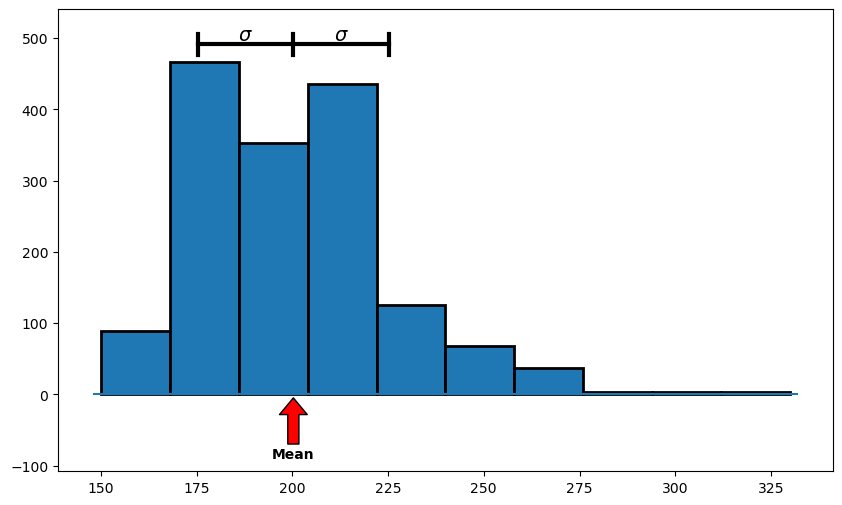

In [19]:
plt.figure(figsize = (10,6))

std_plot(espn_100.weight, edgecolor = 'black', linewidth = 2)

z-scores

In [21]:
espn_100['weight_z-score'] = (espn_100.weight - espn_100.weight.mean()) / espn_100.weight.std(ddof = 0)

In [22]:
espn_100['weight_z-score'].std()

1.0003156067618355

Let's look at height z-scores for Kevin Love

In [24]:
espn_100.loc[(espn_100.player == 'Kevin Love')]

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,NaN,99,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823


Quartiles and Quantiles/Percentiles

In [25]:
espn_100.weight.quantile(q = 0.25)

180.0

In [27]:
espn_100.weight.quantile(q = 0.5)

195.0

In [28]:
espn_100.weight.quantile(q = 0.75)

215.0

In [29]:
espn_100.weight.describe()

count    1585.000000
mean      200.282019
std        24.938345
min       150.000000
25%       180.000000
50%       195.000000
75%       215.000000
max       330.000000
Name: weight, dtype: float64

Interquartile Range

In [30]:
espn_100.weight.quantile(q = 0.75) - espn_100.weight.quantile(q = 0.25)

35.0

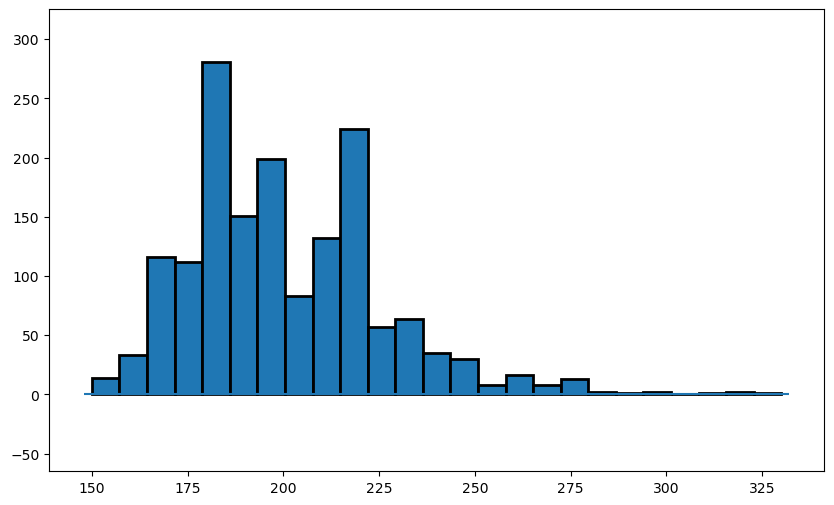

In [31]:
plt.figure(figsize = (10,6))

iqr_plot(espn_100.weight, bins = 25, edgecolor = 'black', linewidth = 2)

Observing Outliers in the Dataset

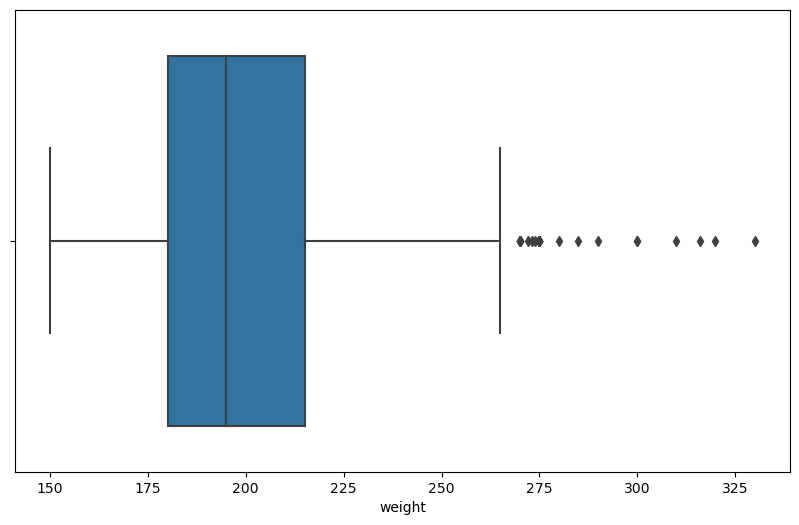

In [32]:
plt.figure(figsize = (10,6))
sns.boxplot(x = espn_100.weight);

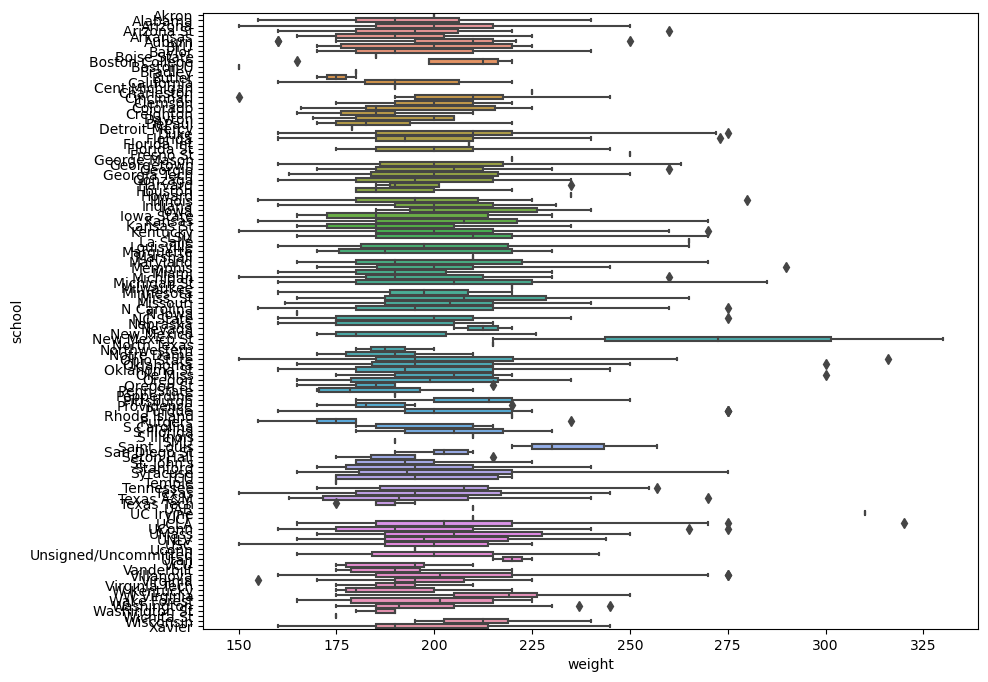

In [34]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('school'), x = "weight", y = "school");

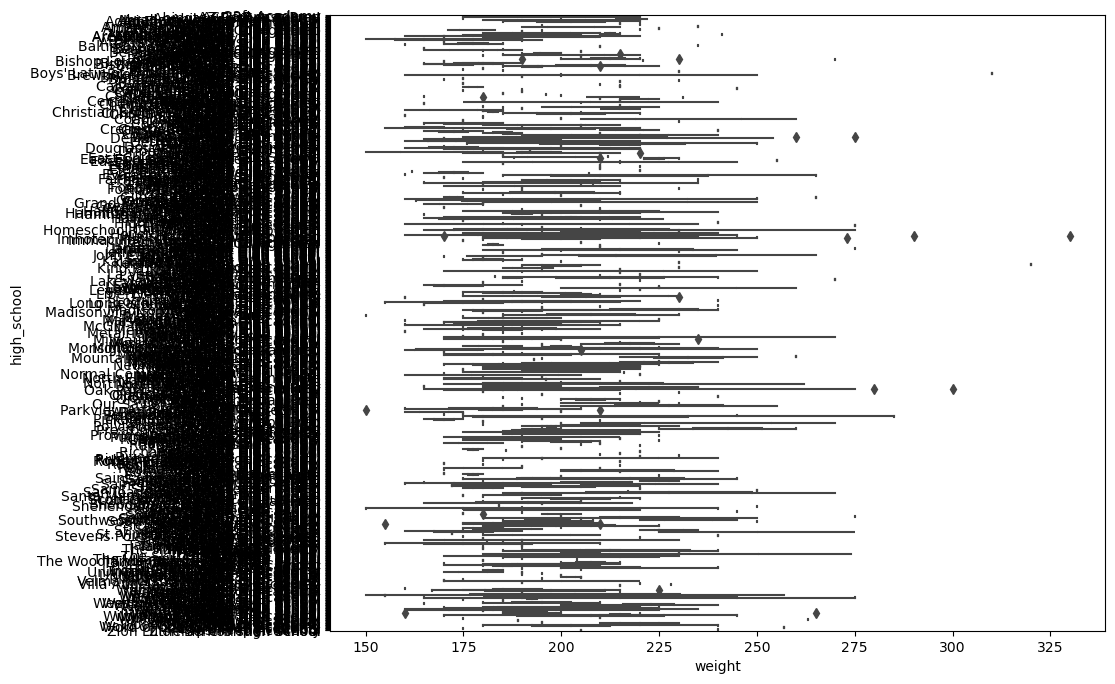

In [81]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('high_school'), x = "weight", y = "high_school");

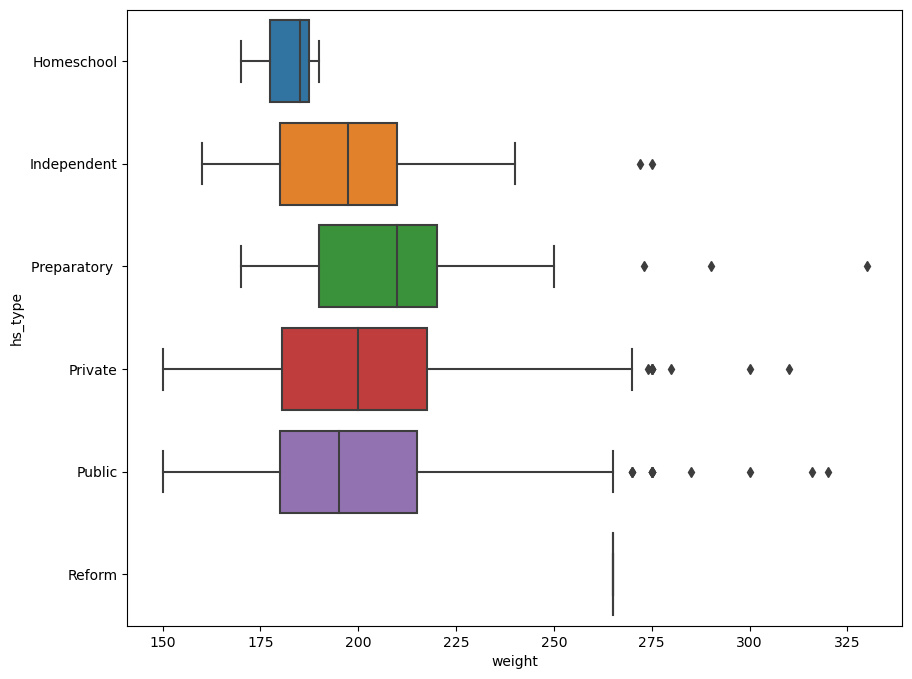

In [36]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_type'), x = "weight", y = "hs_type");

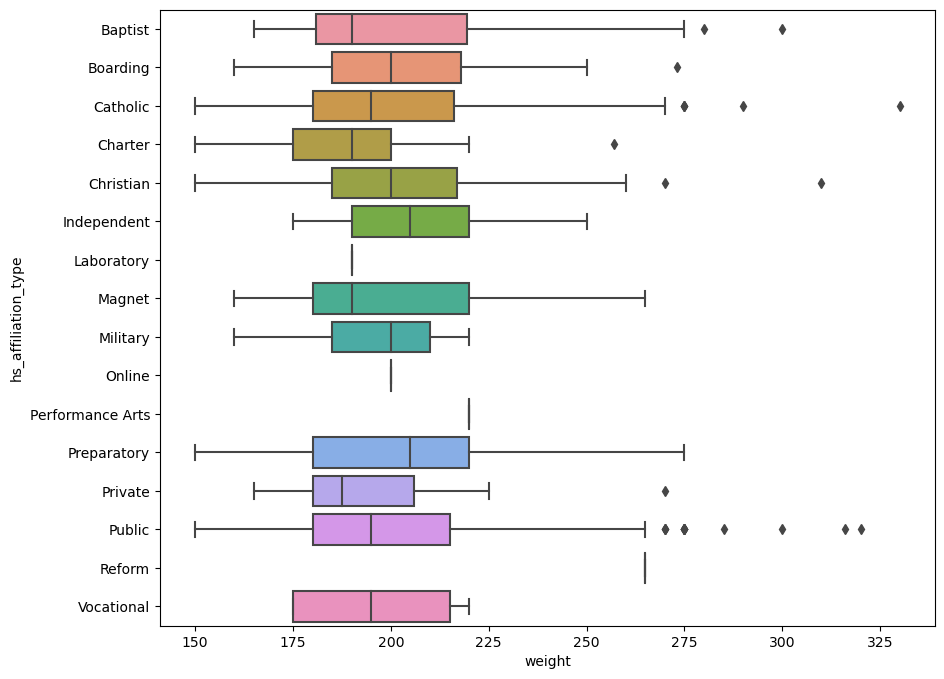

In [37]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_affiliation_type'), x = "weight", y = "hs_affiliation_type");

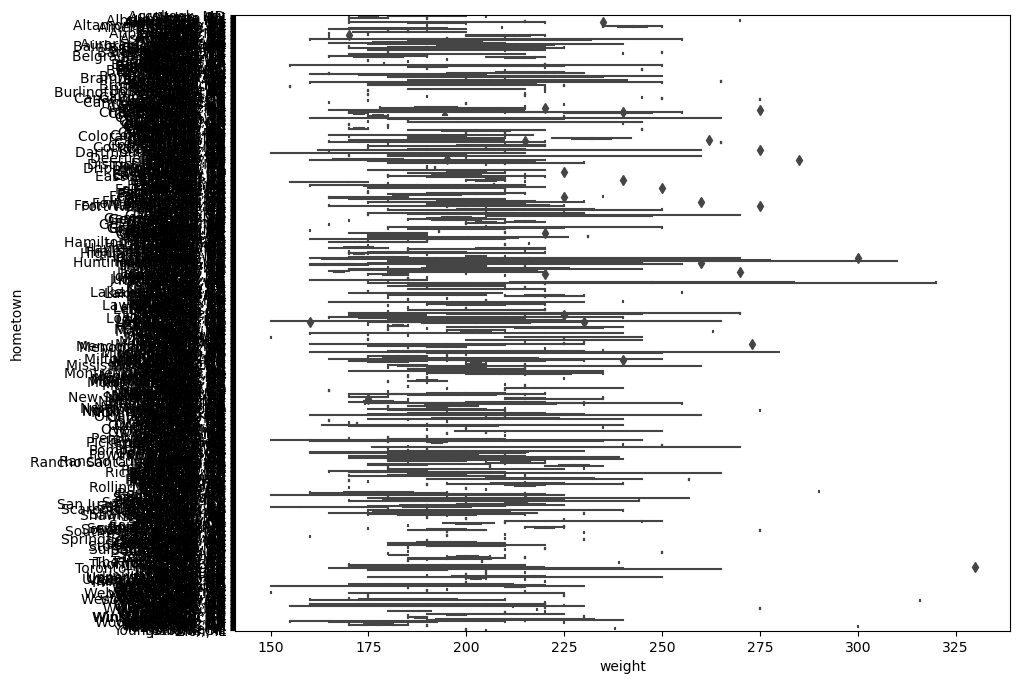

In [38]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hometown'), x = "weight", y = "hometown");

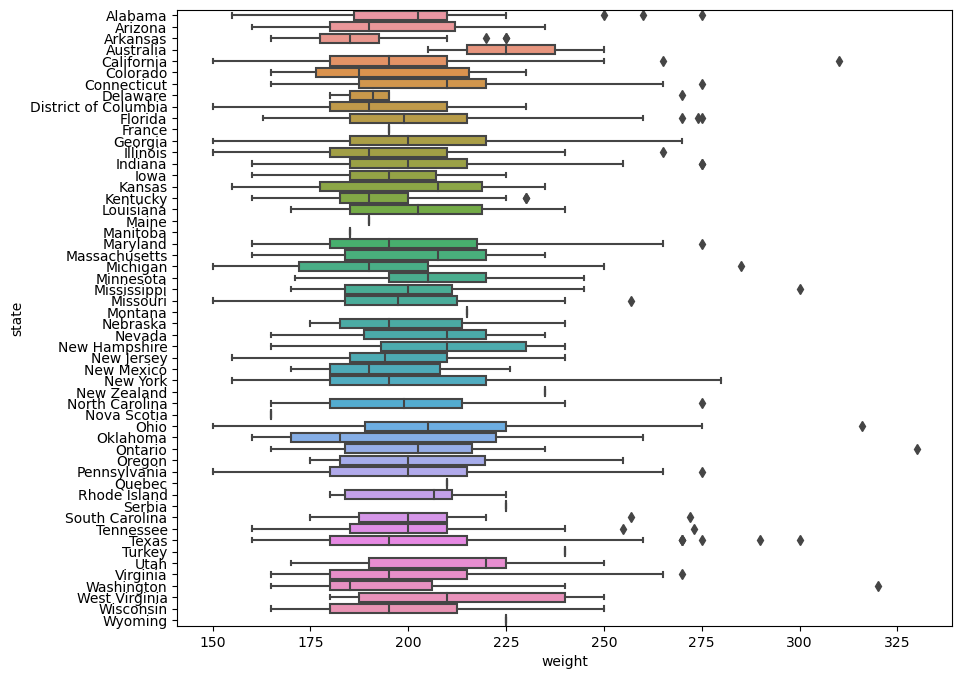

In [39]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('state'), x = "weight", y = "state");

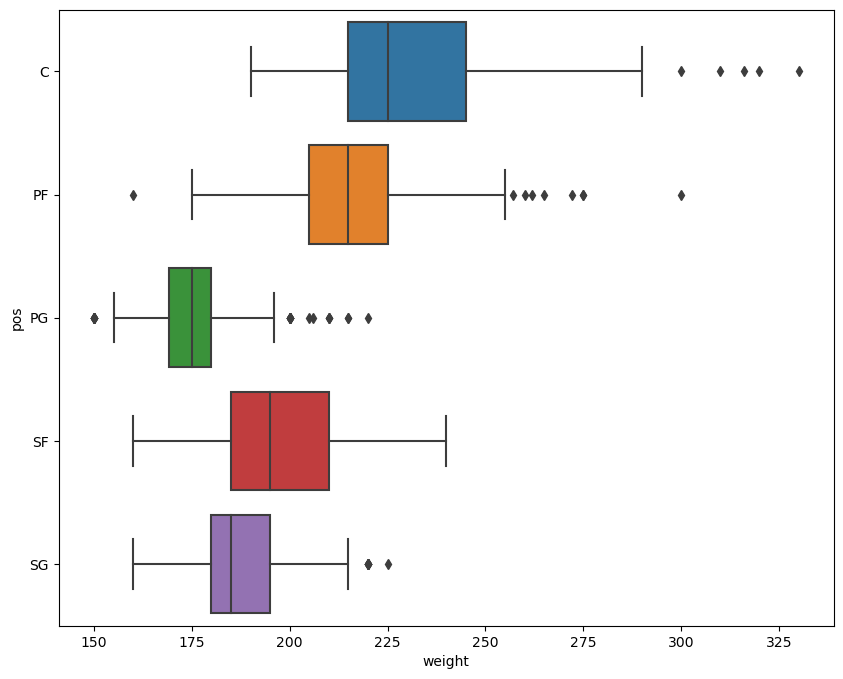

In [40]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('pos'), x = "weight", y = "pos");

# Player Height Statisitcs

In [41]:
espn_100.ht_inches.mean()

77.94172932330827

In [ ]:
espn_100.ht_inches.median()

78.0

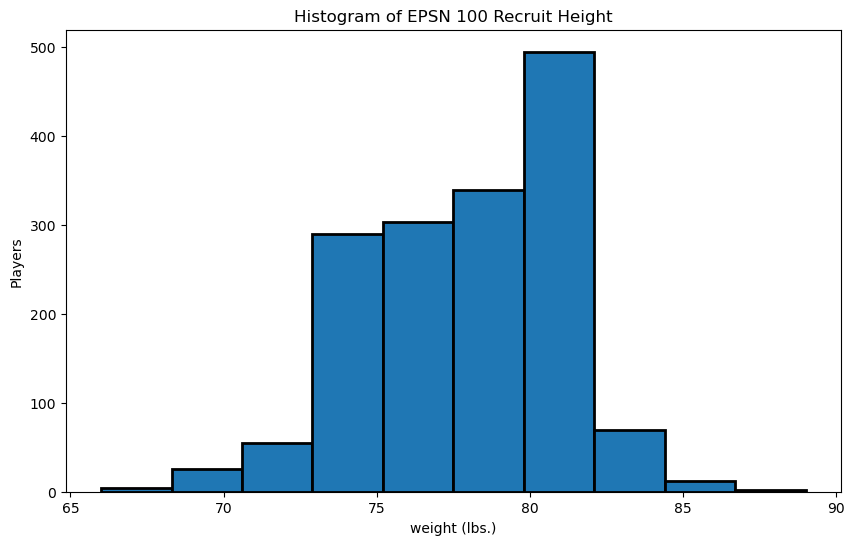

In [43]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = espn_100,
    x = 'ht_inches',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('weight (lbs.)')                            
plt.ylabel('Players')
plt.title('Histogram of EPSN 100 Recruit Height');

Let's look at the range in height

In [44]:
espn_100.ht_inches.max()

89

In [45]:
espn_100.nlargest(1,'ht_inches')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score
670,2013,74,Mamadou Ndiaye,Mamadou,Ndiaye,C,"Huntington Beach, CA",Brethren Christian High School,Private,Christian,...,4.0,85,UC Irvine,Big West,Mid Major,NO,NO,109.717981,12038.035371,4.400958


In [46]:
espn_100.ht_inches.min()

66

In [47]:
espn_100.nsmallest(1,'ht_inches')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score
174,2008,75,Erving Walker,Erving,Walker,PG,"Middle Village, NY",Christ the King High School,Private,Catholic,...,NaN,93,Florida,SEC,Power 5,NO,NO,-40.282019,1622.641049,-1.615774


In [48]:
espn_100.ht_inches.max()- espn_100.ht_inches.min()

23

Variance and Standard Devivation

In [49]:
espn_100['height_deviation'] = espn_100.ht_inches - espn_100.ht_inches.mean()
espn_100.head()

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,99,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,98,Indiana,Big Ten,Power 5,YES,YES,4.717981,22.259345,0.189246,-0.941729
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,98,USC,Pac-12,Power 5,YES,YES,-5.282019,27.899724,-0.211870,-1.941729
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,98,Duke,ACC,Power 5,YES,YES,14.717981,216.618967,0.590361,2.058271
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,98,Memphis,CUSA,Mid Major,YES,YES,-5.282019,27.899724,-0.211870,-1.941729


In [50]:
espn_100.ht_inches.std()

3.238249152216237

In [51]:
espn_100['height_deviation'].mean()

4.701335394502918e-15

In [52]:
espn_100['squared_height_deviation'] = espn_100['height_deviation']**2
espn_100

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271,9.353020
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,Indiana,Big Ten,Power 5,YES,YES,4.717981,22.259345,0.189246,-0.941729,0.886854
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,USC,Pac-12,Power 5,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,Duke,ACC,Power 5,YES,YES,14.717981,216.618967,0.590361,2.058271,4.236478
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,Memphis,CUSA,Mid Major,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2022,96,Tyler Nickel,Tyler,Nickel,PF,"Elkton, VA",East Rockingham High School,Public,Public,...,N Carolina,ACC,Power 5,NO,NO,14.717981,216.618967,0.590361,2.058271,4.236478
1592,2022,97,Christian Watson,Christian,Watson,SF,"Washington, DC",St. John's College High School,Private,Catholic,...,Miami,ACC,Power 5,NO,NO,-20.282019,411.360292,-0.813543,0.058271,0.003395
1593,2022,98,Desmond Claude,Desmond,Claude,SG,"Putnam, CT",Putnam Science Academy,Private,Preparatory,...,Xavier,Big East,Other,NO,NO,-10.282019,105.719913,-0.412428,-0.941729,0.886854
1594,2022,99,Alphonzo Billups,Alphonzo,Billups,SF,"Richmond, VA",Varina High School,Public,Public,...,VCU,A-10,Mid Major,NO,NO,-5.282019,27.899724,-0.211870,0.058271,0.003395


Population Standard Deviation

In [53]:
np.sqrt(espn_100['squared_height_deviation'].mean())

3.2372345041724744

In [54]:
espn_100.ht_inches.var(ddof = 0)

10.479687235004725

In [55]:
espn_100.ht_inches.std(ddof = 0)

3.237234504172462

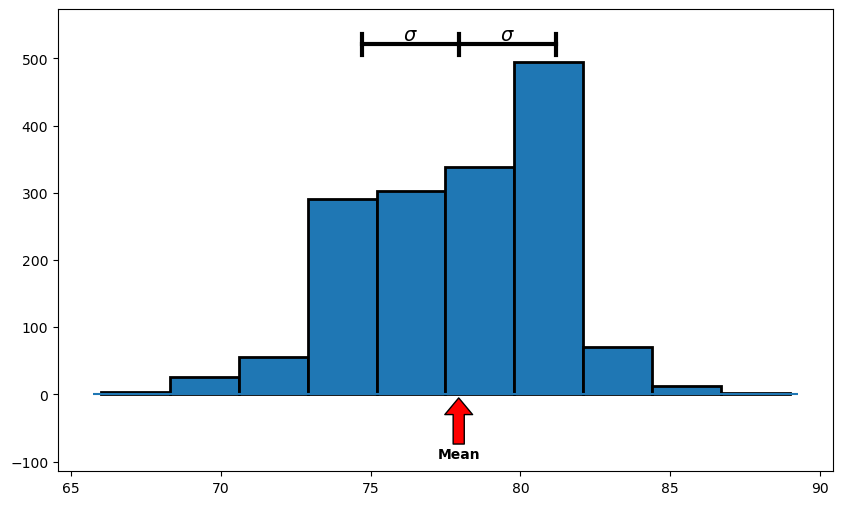

In [56]:
plt.figure(figsize = (10,6))

std_plot(espn_100.ht_inches, edgecolor = 'black', linewidth = 2)

z-scores

In [58]:
espn_100['height_z-score'] = (espn_100.ht_inches - espn_100.ht_inches.mean()) / espn_100.ht_inches.std(ddof = 0)

In [59]:
espn_100['height_z-score'].std()

1.0003134305044832

Let's look at height z-scores for Kevin Love

In [63]:
espn_100.loc[(espn_100.player == 'Kevin Love')]

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation,height_z-score
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271,9.35302,0.944717


Quartiles and Quantiles/Percentiles

In [64]:
espn_100.ht_inches.quantile(q = 0.25)

76.0

In [65]:
espn_100.ht_inches.quantile(q = 0.5)

78.0

In [66]:
espn_100.ht_inches.quantile(q = 0.75)

80.0

In [67]:
espn_100.ht_inches.describe()

count    1596.000000
mean       77.941729
std         3.238249
min        66.000000
25%        76.000000
50%        78.000000
75%        80.000000
max        89.000000
Name: ht_inches, dtype: float64

Interquartile Range

In [68]:
espn_100.ht_inches.quantile(q = 0.75) - espn_100.ht_inches.quantile(q = 0.25)

4.0

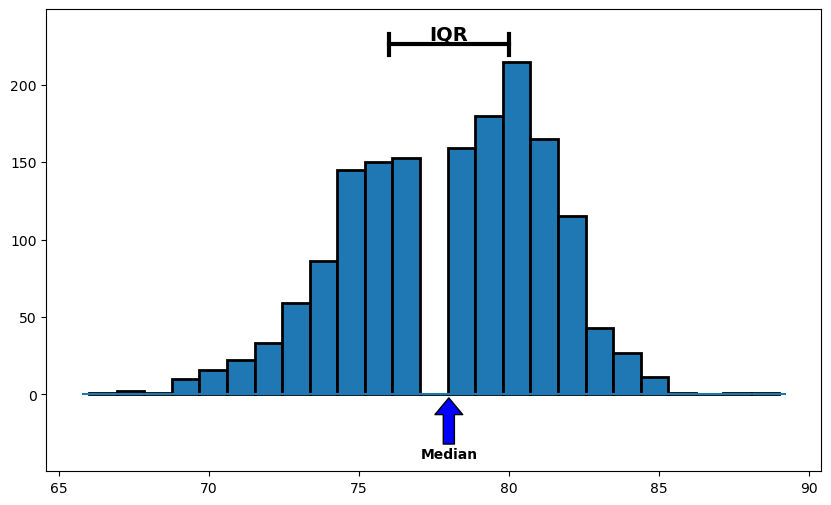

In [69]:
plt.figure(figsize = (10,6))

iqr_plot(espn_100.ht_inches, bins = 25, edgecolor = 'black', linewidth = 2)

Observing Outliers in the Dataset

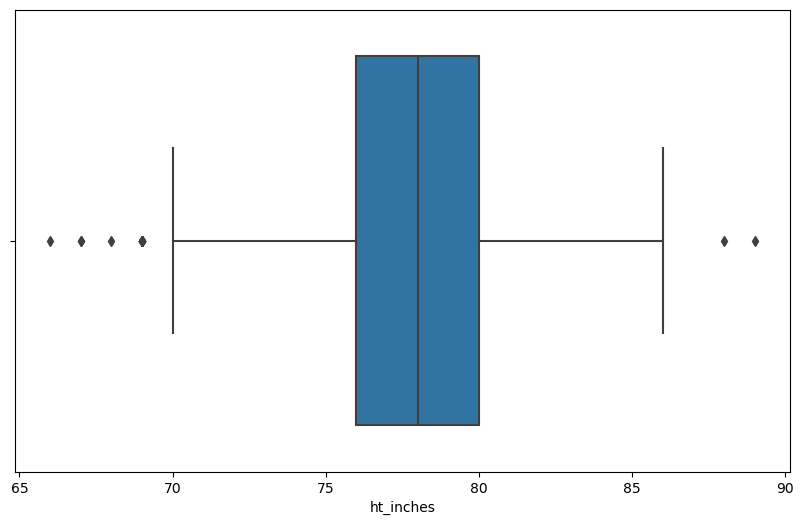

In [70]:
plt.figure(figsize = (10,6))
sns.boxplot(x = espn_100.ht_inches);

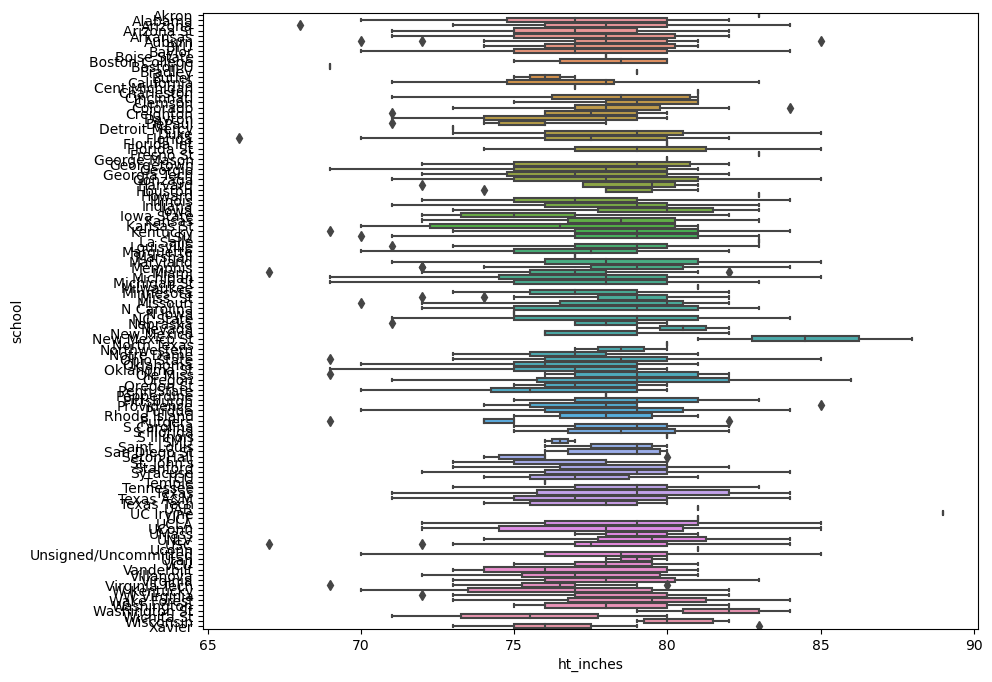

In [71]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('school'), x = "ht_inches", y = "school");

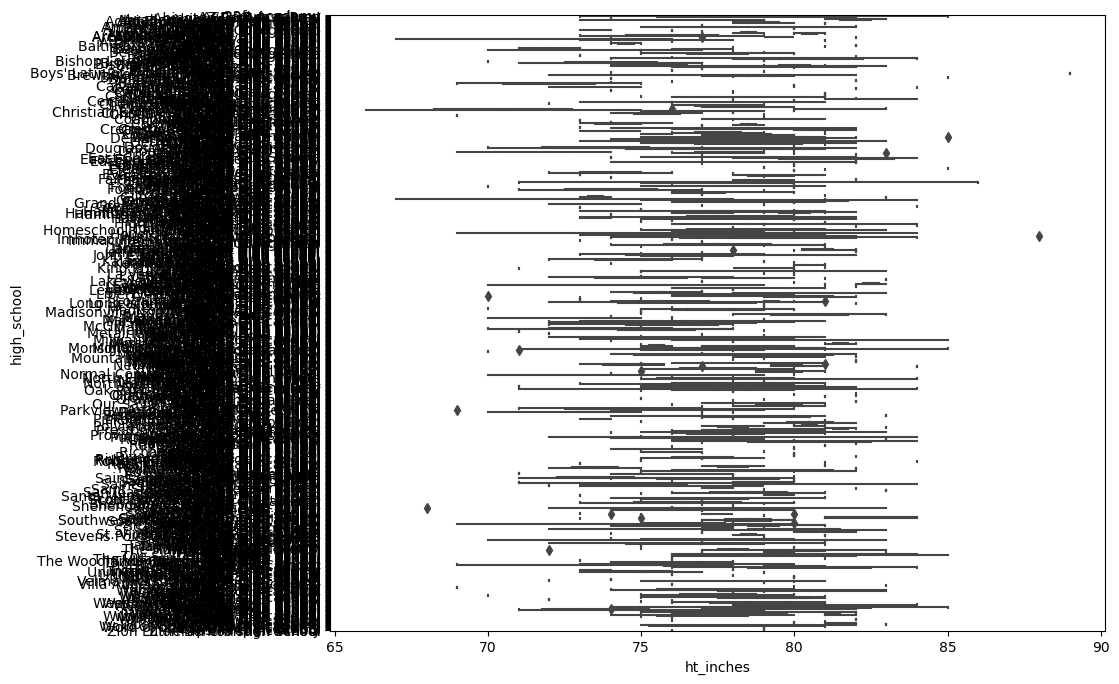

In [72]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('high_school'), x = "ht_inches", y = "high_school");

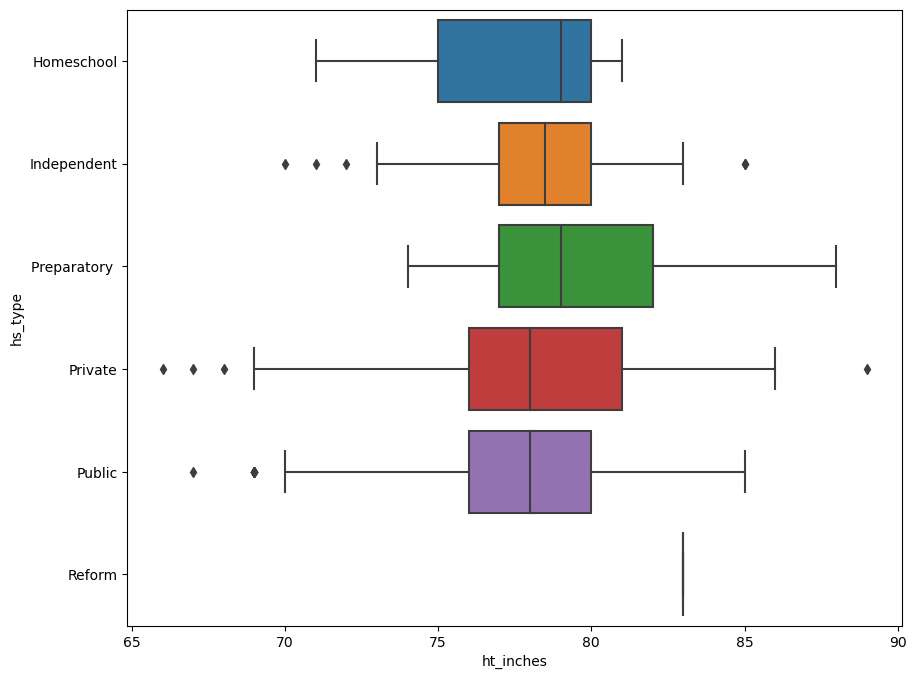

In [73]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_type'), x = "ht_inches", y = "hs_type");

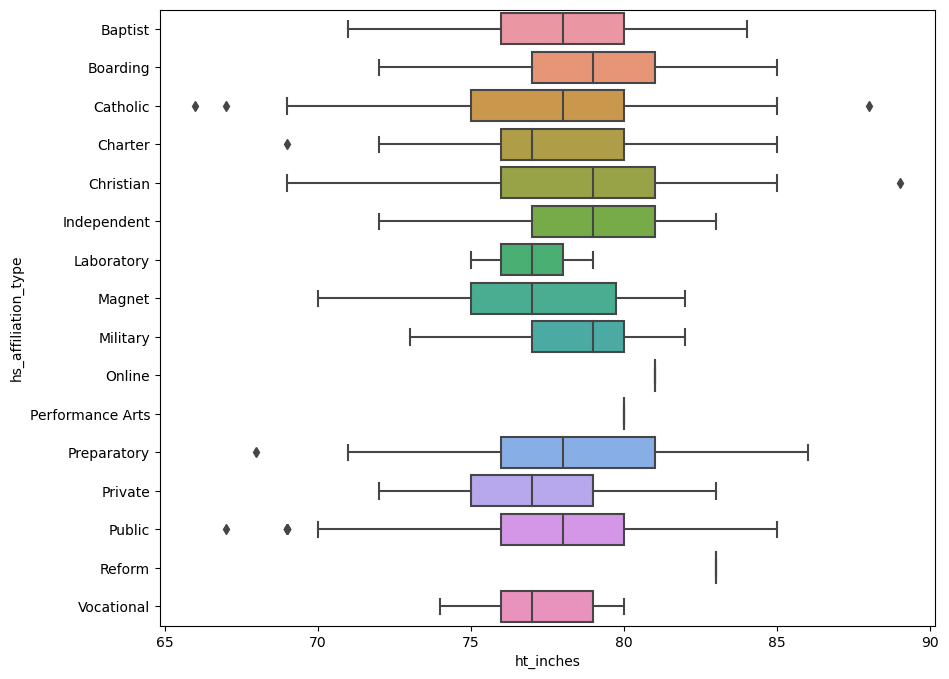

In [74]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_affiliation_type'), x = "ht_inches", y = "hs_affiliation_type");

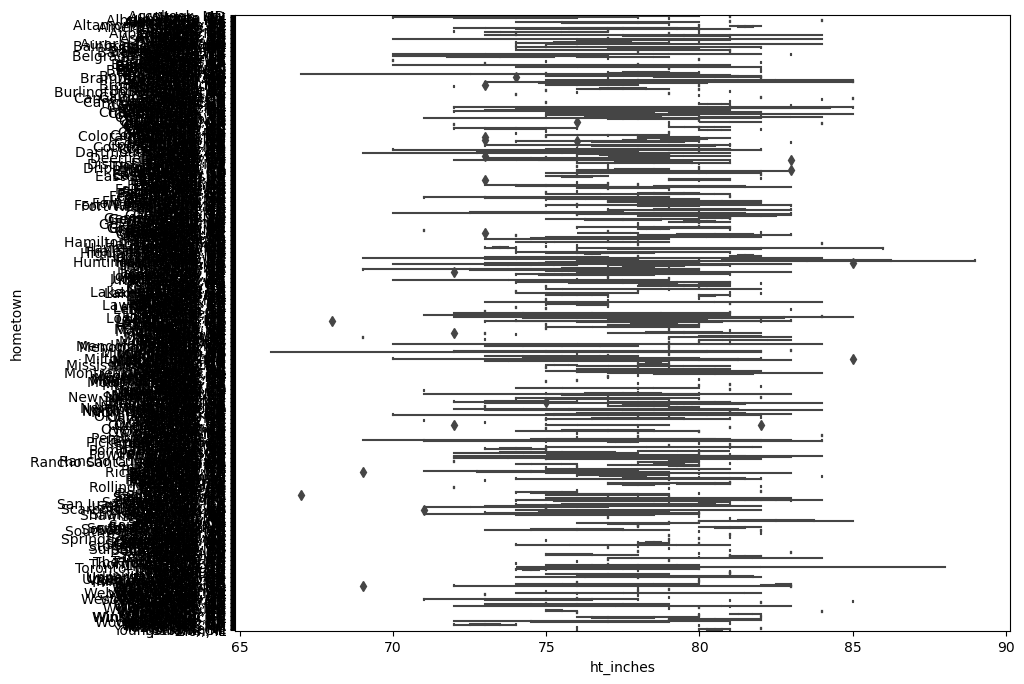

In [75]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hometown'), x = "ht_inches", y = "hometown");

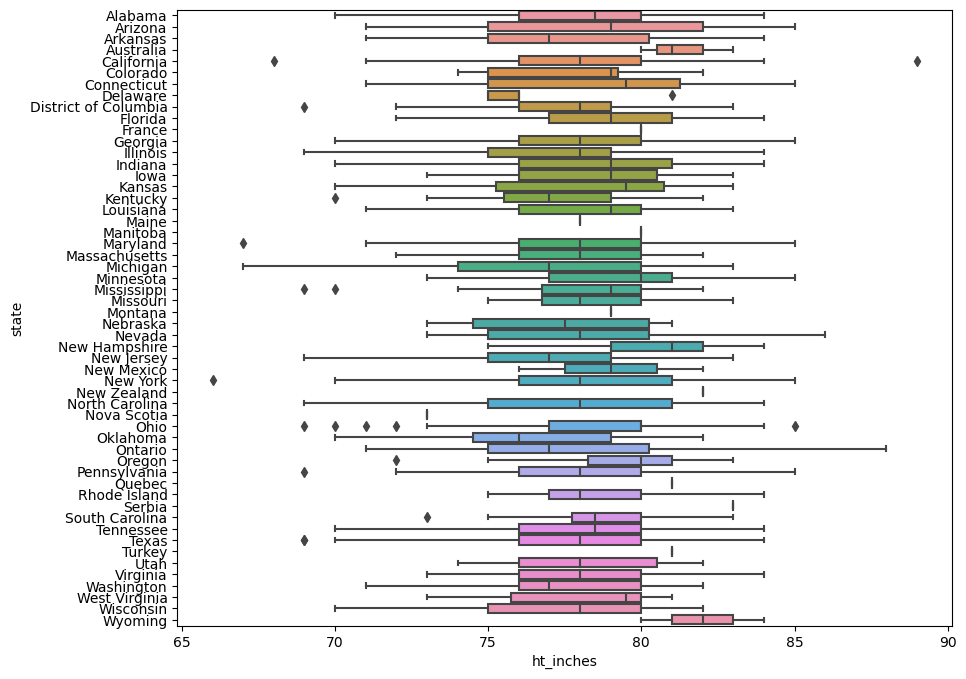

In [76]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('state'), x = "ht_inches", y = "state");

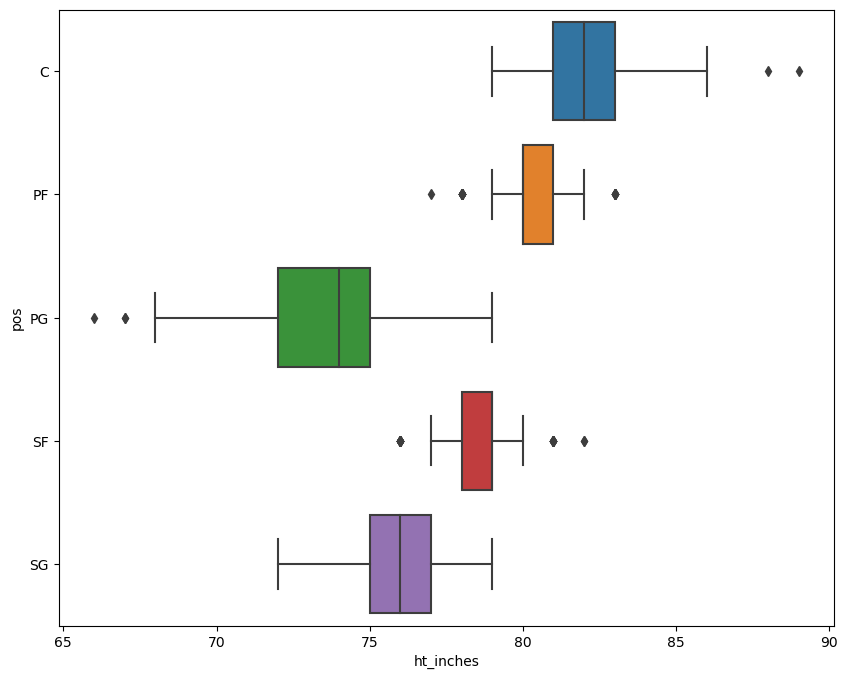

In [77]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('pos'), x = "ht_inches", y = "pos");